In [1]:
reset -f

In [81]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras import regularizers
import os

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [83]:
print(format(os.getcwd()))

/Users/amber/Documents/DAEN-690/dataset


In [84]:
path_to_file = '/Users/amber/Documents/DAEN-690/dataset/testdata.csv'
df1 = pd.read_csv(path_to_file, encoding = "ISO-8859-1",header=0, index_col=False)
print(type(df1))
print(df1.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['InitialIncidentType', 'DispatchedIncidentType',
       'DispatchedEMSCategory', 'ArrivedIncidentType', 'FinalIncidentType',
       'FinalEMSCategory', 'GeoFirstDue', 'time', 'full_call_processing',
       'incident_duration', 'turnout', 'travel_time', 'time_on_call',
       'time_onscene', 'bls_station', 'station_coord_x', 'station_coord_y',
       'incident_amount', 'unit_type', 'unit_coord_x', 'unit_coord_y',
       'response_time'],
      dtype='object')


In [85]:
deformation = df1.iloc[:,-1]/30

In [86]:
print(df1.shape)
deformation

(13168, 22)


0        36.300000
1        11.333333
2        15.700000
3        28.600000
4        18.533333
           ...    
13163     5.933333
13164     6.966667
13165     4.633333
13166    13.500000
13167    12.233333
Name: response_time, Length: 13168, dtype: float64

In [87]:
x_data = df1.iloc[:,df1.columns != 'response_time']
x_data = x_data.iloc[:,x_data.columns != 'incident_amount']
x_data = x_data.iloc[:,x_data.columns != 'turnout']
x_data = x_data.iloc[:,x_data.columns != 'GeoFirstDue']
x_data = x_data.iloc[:,x_data.columns != 'incident_duration']
x_data = x_data.iloc[:,x_data.columns != 'time_on_call']

In [88]:
print(x_data.shape)

(13168, 16)


In [89]:
cols = []
count = 1
for column in x_data.columns:
    cols.append(f'Number_{count}')
    count = count + 1
    continue

x_data.columns = cols

In [90]:
#Creating Feature Columns
feat_cols=[]
for cols in x_data.columns:
    column= tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
#print(feat_cols)
print(type(feat_cols))

<class 'list'>


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler_model = StandardScaler()
scaler_model.fit(x_data)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


StandardScaler()

In [92]:
#np.savetxt('hxp_mean.txt', scaler_model.mean_, fmt='%2.5f')
#np.savetxt('hxp_var.txt', scaler_model.var_, fmt='%2.5f')

In [93]:
X_train, X_eval,y_train,y_eval=train_test_split(x_data,deformation,test_size=0.1,random_state=1)

In [94]:
X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [95]:
X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)
#print(X_eval)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [96]:
#print((0.74558053-0.5002686206)/np.sqrt(0.0418660216))
#print(X_eval)

In [97]:
# Neural network
model = Sequential()
model.add(Dense(32, input_dim = 16, kernel_initializer = 'he_normal', activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(16, activation='relu')) #kernel_regularizer=regularizers.L2(0.01)
model.add(Dense(16, activation='linear'))
model.add(Dense(1,activation='relu'))

In [99]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanAbsolutePercentageError'])

In [100]:
history = model.fit(X_train, y_train, epochs=300, batch_size=50, shuffle=True)

Epoch 1/300
238/238 [==============================] - 1s 1ms/step - loss: 63.6655 - mean_absolute_percentage_error: 44.1953
Epoch 2/300
238/238 [==============================] - 0s 1ms/step - loss: 27.4488 - mean_absolute_percentage_error: 28.3102
Epoch 3/300
238/238 [==============================] - 0s 1ms/step - loss: 24.7646 - mean_absolute_percentage_error: 26.6693
Epoch 4/300
238/238 [==============================] - 0s 1ms/step - loss: 22.8026 - mean_absolute_percentage_error: 25.4296
Epoch 5/300
238/238 [==============================] - 1s 2ms/step - loss: 21.3711 - mean_absolute_percentage_error: 24.3142
Epoch 6/300
238/238 [==============================] - 1s 2ms/step - loss: 20.3315 - mean_absolute_percentage_error: 23.3475
Epoch 7/300
238/238 [==============================] - 0s 2ms/step - loss: 19.8409 - mean_absolute_percentage_error: 22.8833
Epoch 8/300
238/238 [==============================] - 0s 1ms/step - loss: 19.4973 - mean_absolute_percentage_error: 22.4688


238/238 [==============================] - 0s 1ms/step - loss: 18.0804 - mean_absolute_percentage_error: 21.3056
Epoch 67/300
238/238 [==============================] - 0s 1ms/step - loss: 18.0853 - mean_absolute_percentage_error: 21.4318
Epoch 68/300
238/238 [==============================] - 0s 1ms/step - loss: 18.1000 - mean_absolute_percentage_error: 21.3873
Epoch 69/300
238/238 [==============================] - 0s 1ms/step - loss: 18.0720 - mean_absolute_percentage_error: 21.2326
Epoch 70/300
238/238 [==============================] - 0s 1ms/step - loss: 18.0817 - mean_absolute_percentage_error: 21.3590
Epoch 71/300
238/238 [==============================] - 0s 1ms/step - loss: 18.0694 - mean_absolute_percentage_error: 21.3942
Epoch 72/300
238/238 [==============================] - 0s 1ms/step - loss: 18.0974 - mean_absolute_percentage_error: 21.5332
Epoch 73/300
238/238 [==============================] - 0s 1ms/step - loss: 18.0180 - mean_absolute_percentage_error: 21.3777
Epoch

238/238 [==============================] - 0s 1ms/step - loss: 17.5866 - mean_absolute_percentage_error: 21.2936
Epoch 131/300
238/238 [==============================] - 0s 1ms/step - loss: 17.5898 - mean_absolute_percentage_error: 21.2302
Epoch 132/300
238/238 [==============================] - 0s 1ms/step - loss: 17.5687 - mean_absolute_percentage_error: 21.2046
Epoch 133/300
238/238 [==============================] - 0s 1ms/step - loss: 17.6141 - mean_absolute_percentage_error: 21.2123
Epoch 134/300
238/238 [==============================] - 0s 1ms/step - loss: 17.6021 - mean_absolute_percentage_error: 21.3011
Epoch 135/300
238/238 [==============================] - 0s 1ms/step - loss: 17.5536 - mean_absolute_percentage_error: 21.2179
Epoch 136/300
238/238 [==============================] - 0s 1ms/step - loss: 17.5651 - mean_absolute_percentage_error: 21.2510
Epoch 137/300
238/238 [==============================] - 0s 1ms/step - loss: 17.5427 - mean_absolute_percentage_error: 21.236

238/238 [==============================] - 0s 1ms/step - loss: 17.3057 - mean_absolute_percentage_error: 21.3022
Epoch 195/300
238/238 [==============================] - 0s 1ms/step - loss: 17.2728 - mean_absolute_percentage_error: 21.2206
Epoch 196/300
238/238 [==============================] - 0s 1ms/step - loss: 17.2878 - mean_absolute_percentage_error: 21.2225
Epoch 197/300
238/238 [==============================] - 0s 1ms/step - loss: 17.1687 - mean_absolute_percentage_error: 21.2049
Epoch 198/300
238/238 [==============================] - 0s 1ms/step - loss: 17.2492 - mean_absolute_percentage_error: 21.2506
Epoch 199/300
238/238 [==============================] - 0s 1ms/step - loss: 17.2022 - mean_absolute_percentage_error: 21.2435
Epoch 200/300
238/238 [==============================] - 0s 1ms/step - loss: 17.2498 - mean_absolute_percentage_error: 21.1910
Epoch 201/300
238/238 [==============================] - 0s 1ms/step - loss: 17.1769 - mean_absolute_percentage_error: 21.139

238/238 [==============================] - 0s 1ms/step - loss: 17.0585 - mean_absolute_percentage_error: 21.2711
Epoch 259/300
238/238 [==============================] - 0s 1ms/step - loss: 17.0214 - mean_absolute_percentage_error: 21.1589
Epoch 260/300
238/238 [==============================] - 0s 1ms/step - loss: 16.9829 - mean_absolute_percentage_error: 21.1904
Epoch 261/300
238/238 [==============================] - 0s 1ms/step - loss: 17.0278 - mean_absolute_percentage_error: 21.2790
Epoch 262/300
238/238 [==============================] - 0s 1ms/step - loss: 17.1141 - mean_absolute_percentage_error: 21.1272
Epoch 263/300
238/238 [==============================] - 0s 1ms/step - loss: 16.9997 - mean_absolute_percentage_error: 21.3101
Epoch 264/300
238/238 [==============================] - 0s 1ms/step - loss: 17.1355 - mean_absolute_percentage_error: 21.1731
Epoch 265/300
238/238 [==============================] - 0s 1ms/step - loss: 17.0690 - mean_absolute_percentage_error: 21.223

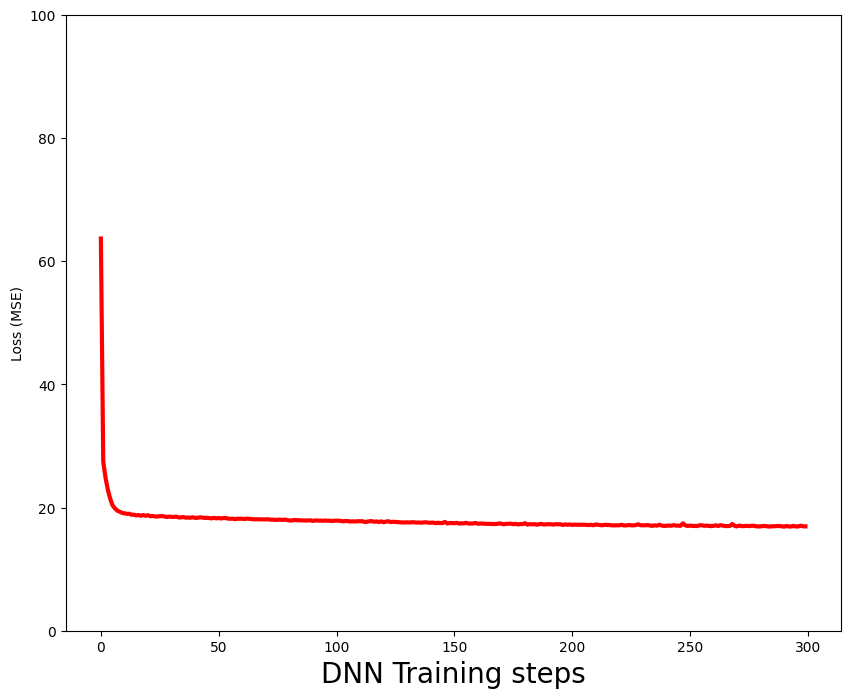

In [101]:
# manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(history.history['loss'],'r-',linewidth=3.0) 
plt.ylim((0,100))
plt.xlabel('DNN Training steps', fontsize = 20)
plt.ylabel('Loss (MSE)')
plt.show()

In [102]:
ytrain_pred = model.predict(X_train,batch_size=None)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,ytrain_pred)
print(R2)

371/371 [==============================] - 0s 921us/step
0.38097946480135436


/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [103]:
y_pred = model.predict(X_eval,batch_size=None)
from sklearn.metrics import r2_score
R2 = r2_score(y_eval,y_pred)
print(R2)

42/42 [==============================] - 0s 1ms/step
0.262468152738357


/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
frd = []
for i in range(len(y_pred)):
    frd.append(y_pred[i,0])
mape = keras.losses.MeanSquaredError()
print(mape(y_eval.to_numpy(), frd).numpy())
R2 = r2_score(y_eval,frd)
print(R2)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(y_pred[:200], color = 'blue', label = 'Predicted data')
plt.plot(y_eval.values[:200], color = 'red', label = 'Real test data')
plt.legend(fontsize=20)
plt.ylabel('Response Time')
plt.show()

In [ ]:
#frd_1 = model.layers[0].get_weights()
#frd_2 = model.layers[1].get_weights()
#frd_3 = model.layers[2].get_weights()
#frd_4 = model.layers[3].get_weights()

In [ ]:
#np.savetxt('weight_layer1.txt', frd_1[0], fmt='%f')
#np.savetxt('bias_layer1.txt', frd_1[1], fmt='%f')
#np.savetxt('weight_layer2.txt', frd_2[0], fmt='%f')
#np.savetxt('bias_layer2.txt', frd_2[1], fmt='%f')
#np.savetxt('weight_layer3.txt', frd_3[0], fmt='%f')
#np.savetxt('bias_layer3.txt', frd_3[1], fmt='%f')
#np.savetxt('weight_layer4.txt', frd_4[0], fmt='%f')
#np.savetxt('bias_layer4.txt', frd_4[1], fmt='%f')

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(y_eval.values,y_pred, color = 'blue')
plt.plot(y_eval.values, y_eval.values,color = 'red',linewidth = 3.0)
plt.xlim((20,130))
plt.ylim((20,130))
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(x=y_eval.values, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.ylim(0,3000)

In [ ]:
plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(x=deformation, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.ylim(0,12000)